<div class="text_cell_render border-box-sizing rendered_html">
<h2>Stroke Prediction</h2>

<h3>1) Introduction</h3>
<li>1.1. Importing Libraries</li>
<li>1.2. Importing Dataset</li>
<li>1.3. Missing Values</li>

<h3>2) Data Visualization</h3>
<li>2.1. Corr Heat Map</li>
<li>2.2. Count Plot</li>
<li>2.3. Distibution Plot</li>
<li>2.4. Scatter Plot</li>
<li>2.5. Violin Plot</li>
<li>2.6. Pair Plot</li>
    
<h3>3) Data Preprocessing</h3>
<li>3.1. Label Encoder</li>
<li>3.2. X and Y Splitting</li>
<li>3.3. Column Transformator and OneHotEncoder</li>
<li>3.4. Train Test Split</li>
<li>3.5. Smote</li>

<h3>4) Model Selection</h3>
<h3>5) Model Tuning</h3>
</div>

## 1) Introduction
#### 1.1 Importing Libraries

#### 1.2 Importing Dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 1.3 Missing Values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

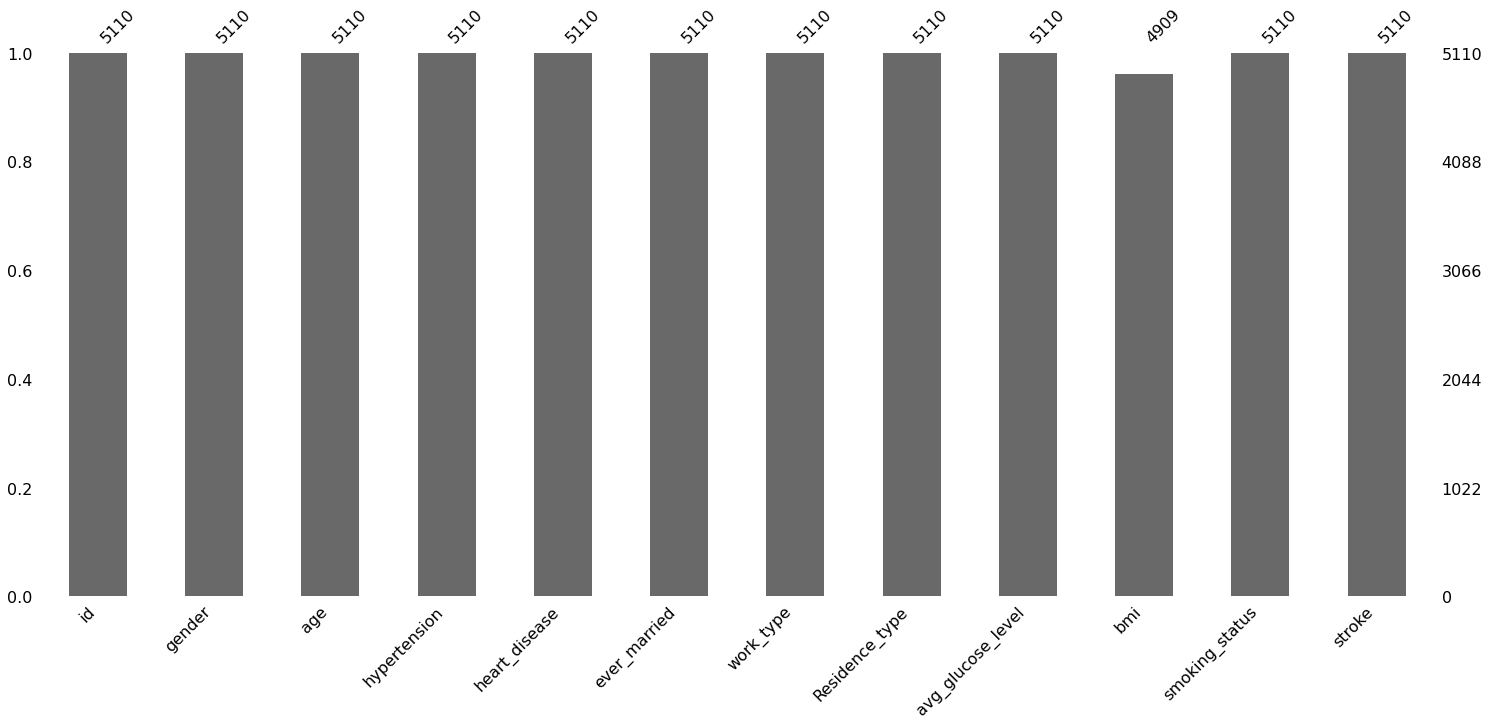

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
#fill the missing values in the Body Mass Index variable with the average value
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 2. Data Visualization

####  2.1 Corr Heat Map [](http://)

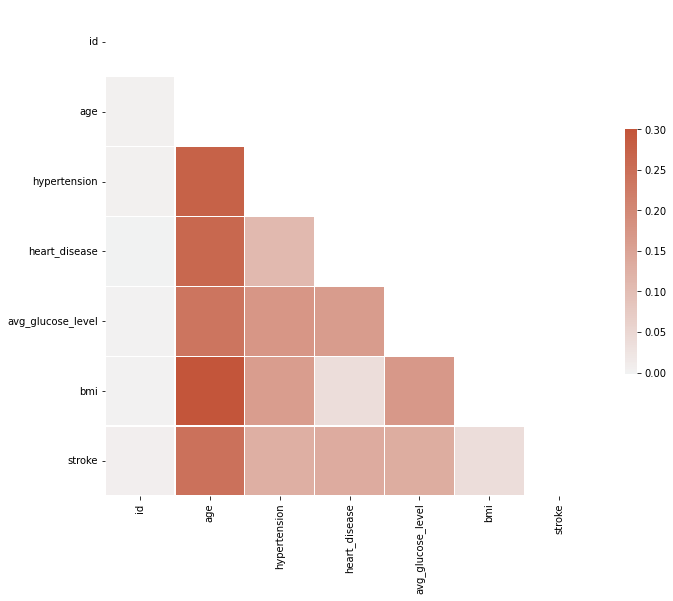

In [ ]:
# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

#### 2.2 Count Plot

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


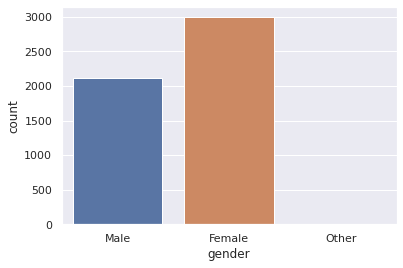

In [ ]:
print(df.gender.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='gender')

Yes    3353
No     1757
Name: ever_married, dtype: int64


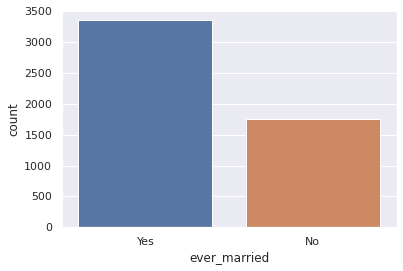

In [ ]:
print(df.ever_married.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='ever_married')

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


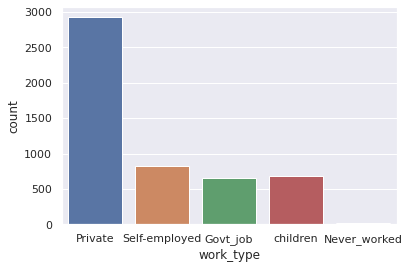

In [ ]:
print(df.work_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='work_type')

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


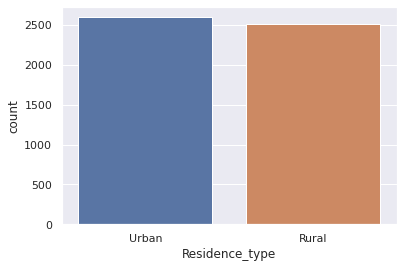

In [ ]:
print(df.Residence_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='Residence_type')

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


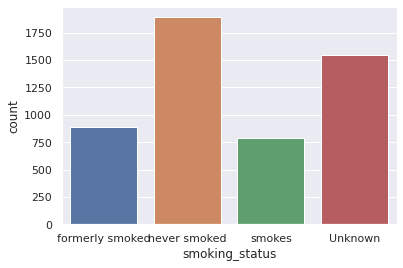

In [ ]:
print(df.smoking_status.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='smoking_status')

0    4861
1     249
Name: stroke, dtype: int64


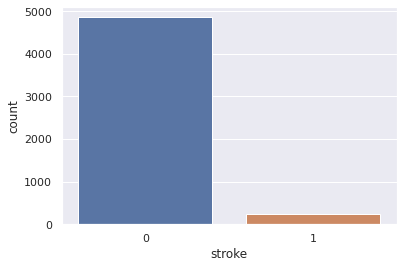

In [ ]:
print(df.stroke.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='stroke')

#### 2.3 Distribution Plot

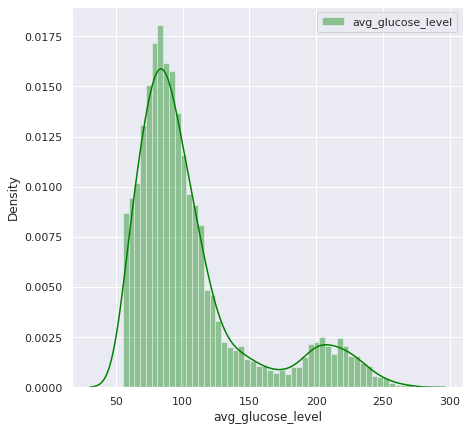

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)
plt.legend()

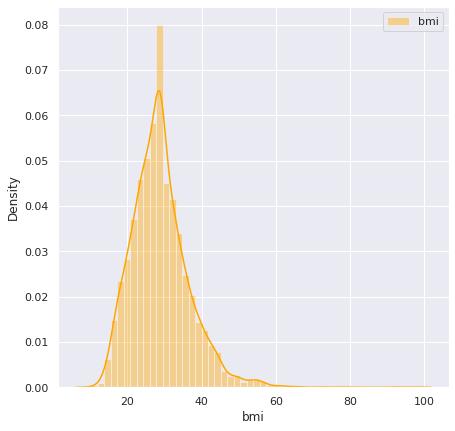

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi,color='orange',label='bmi',kde=True)
plt.legend()

(10.0, 100.0)

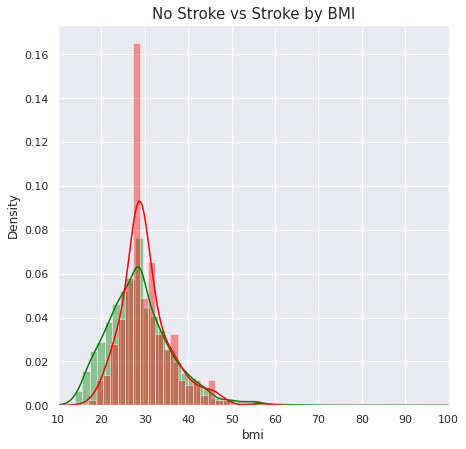

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

(30.0, 330.0)

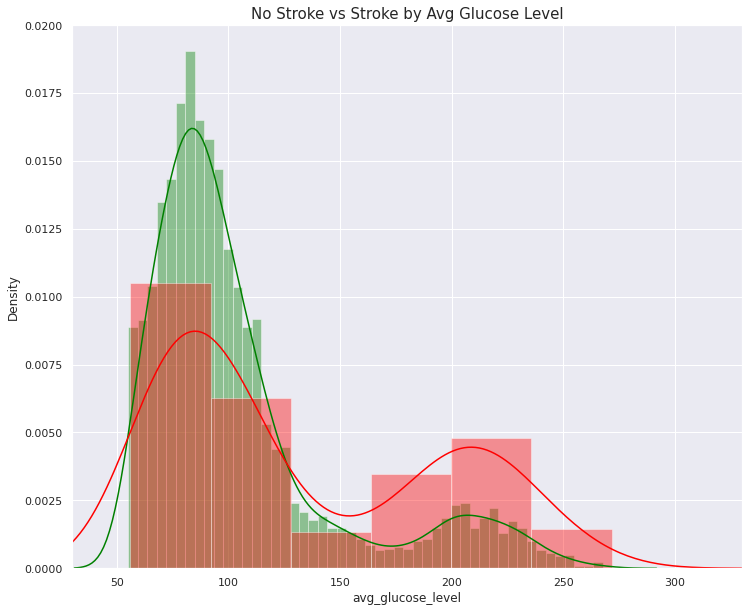

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])

(18.0, 100.0)

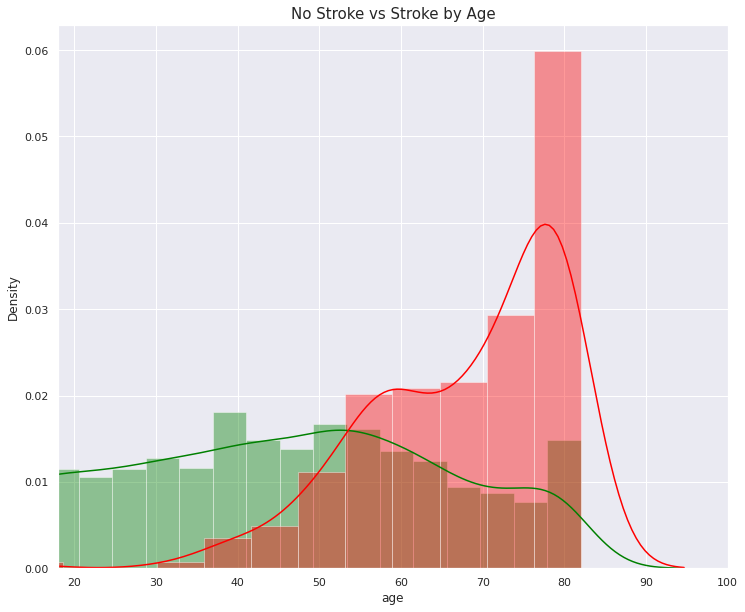

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['age'],color='green')
sns.distplot(df[df['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

#### 2.4 Scatter Plot

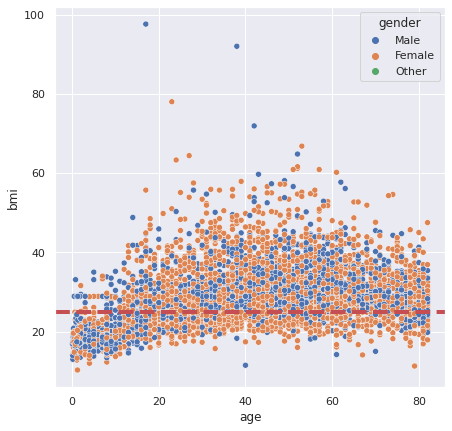

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

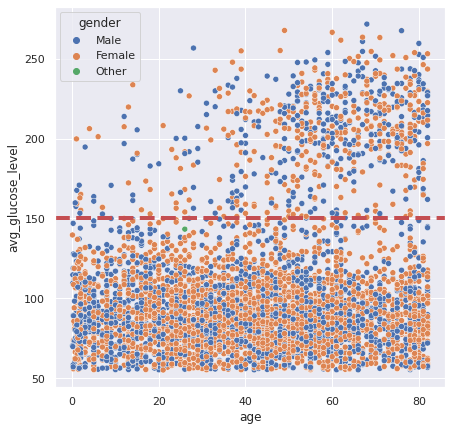

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

#### 2.5 Violin Plot

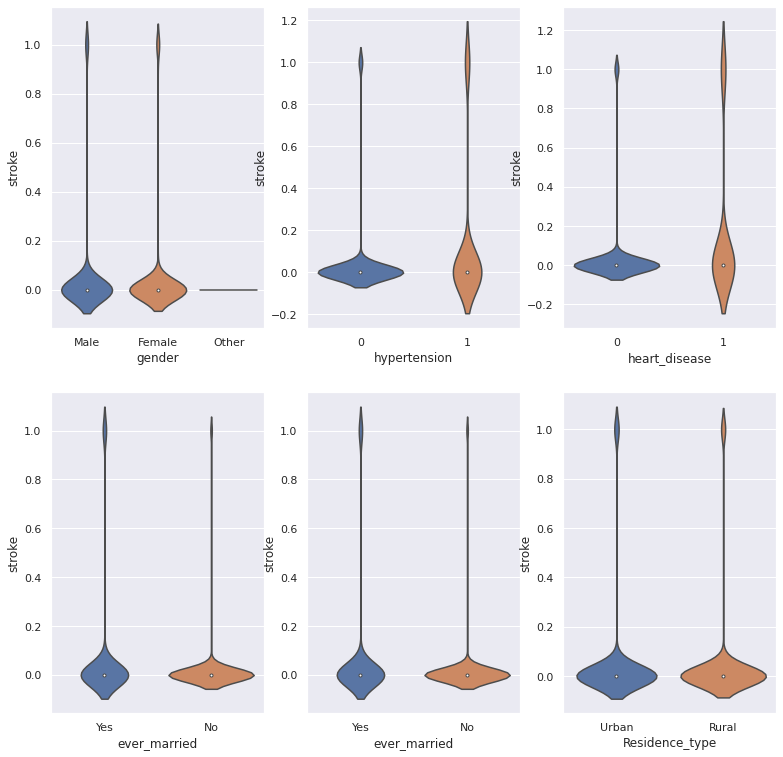

In [ ]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=df)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=df)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=df)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,5)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,6)
sns.violinplot(x='Residence_type',y='stroke',data=df)
plt.show()

#### 2.6 PairPlot

<Figure size 720x720 with 0 Axes>

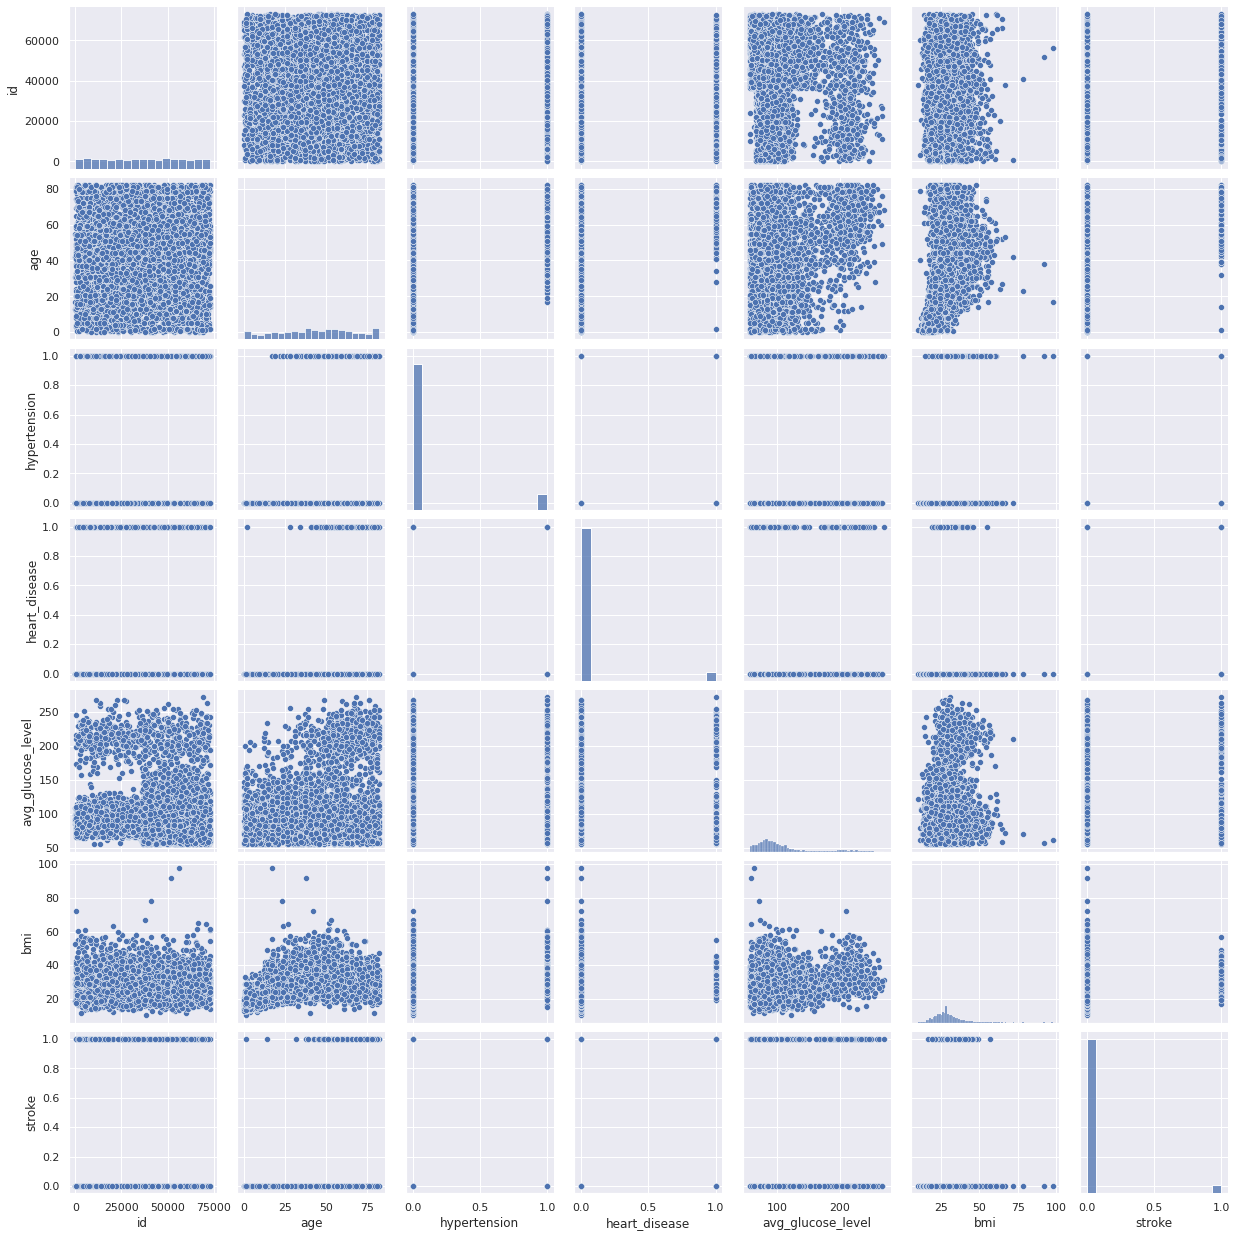

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

## 3. Data Preprocessing

#### 3.1 Label Encoder

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

#### 3.2 X and Y Splitting

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


#### 3.3 Column Transformator and OneHotEncoder 

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

#### 3.4 Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 19)
Number transations x_test df (1022, 19)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


#### 3.5 Smote

In [ ]:
# SMOTE 
# pip install imblearn
# from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7786, 19)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


## 4. Model Selection

In [ ]:
models = []

models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])


In [ ]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regression :
[[755 213]
 [ 15  39]]
Accuracy Score:  0.776908023483366

K-Fold Validation Mean Accuracy: 78.47 %

Standard Deviation: 1.69 %

ROC AUC Score: 0.75 %

Precision: 0.15 %

Recall: 0.72 %

F1 Score: 0.25 %
----------------------------------------

SVM :
[[696 272]
 [ 13  41]]
Accuracy Score:  0.7211350293542075

K-Fold Validation Mean Accuracy: 78.50 %

Standard Deviation: 1.88 %

ROC AUC Score: 0.74 %

Precision: 0.13 %

Recall: 0.76 %

F1 Score: 0.22 %
----------------------------------------

DecisionTree :
[[905  63]
 [ 42  12]]
Accuracy Score:  0.8972602739726028

K-Fold Validation Mean Accuracy: 94.93 %

Standard Deviation: 5.82 %

ROC AUC Score: 0.58 %

Precision: 0.16 %

Recall: 0.22 %

F1 Score: 0.19 %
----------------------------------------

RandomForest :
[[963   5]
 [ 52   2]]
Accuracy Score:  0.9442270058708415

K-Fold Validation Mean Accuracy: 97.16 %

Standard Deviation: 6.76 %

ROC AUC Score: 0.52 %

Precision: 0.29 %

Recall: 0.04 %

F1 Score: 0.07

In [ ]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
3,RandomForest,94.422701,97.162683,6.762548,0.515936,0.285714,0.037037,0.065574
2,DecisionTree,89.726027,94.927664,5.821712,0.578570,0.160000,0.222222,0.186047
0,Logistic Regression,77.690802,78.473787,1.689052,0.751090,0.154762,0.722222,0.254902
1,SVM,72.113503,78.499724,1.881722,0.739134,0.130990,0.759259,0.223433


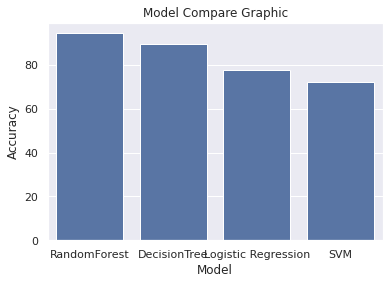

In [ ]:
sns.barplot(x='Model',y='Accuracy',data=df2,color='b')
plt.title('Model Compare Graphic');

## 5. Model Tuning

In [ ]:
grid_models = [(DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 DecisionTreeClassifier(): 
 Best Accuracy: 95.20 %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 97.23 %

-------------------------

